0.0 & -0.499 
0.091 & 0.308 
0.182 & 1.656 
0.273 & 2.15 
0.364 & 1.392 
0.455 & 0.448 
0.545 & 0.602 
0.636 & 1.853 
0.727 & 2.919 
0.818 & 2.733 


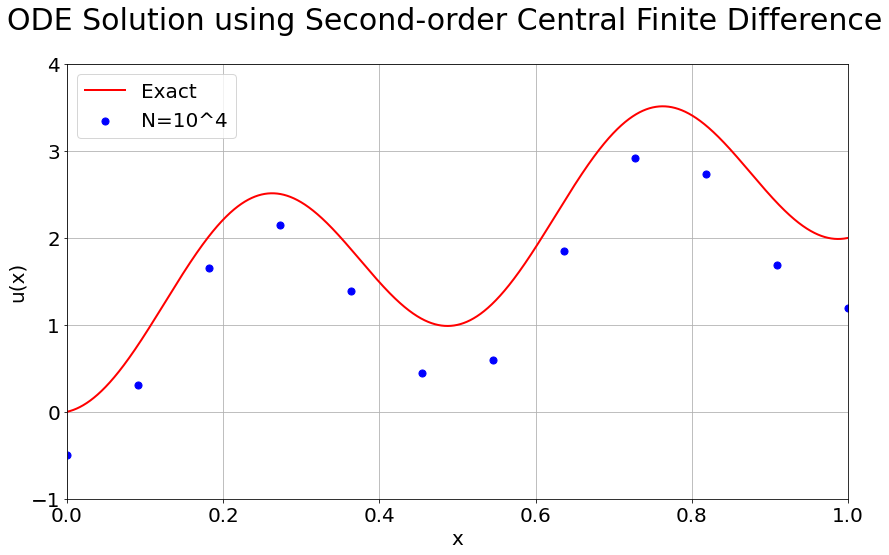

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Define Computational Grid, N = number of interior points
N = 10
x_grid = np.linspace(0, 1, N+2)
u = np.zeros(N+2)
# Apply Boundary Conditions
u[0] = 0
u[-1] = -2
# Calculate step size
h = 1/(N+1)
# Define the second derivative of u, described by f(x)
f = lambda x : ((4*np.pi)**2)*np.cos(4*np.pi*x)
# Compute solution using central finite difference
tridiag_matrix = np.zeros((N+2, N+2)) - 2*np.eye(N+2) + np.eye(N+2, k=1) + np.eye(N+2, k=-1)
u = np.linalg.inv(tridiag_matrix).dot((h**2)*f(x_grid) + u)

# Read in exact solution file
with open("solutionA_N10000.dat") as file:
    lines = file.readlines()
exact_x = np.zeros(len(lines))
exact_y = np.zeros(len(lines))
for index, line in enumerate(lines):
    exact_x[index] = float(line.split(" ")[1])
    exact_y[index] = float(line.split(" ")[3])
    
# Plot the numerical approximation and exact solution
f, ax1 = plt.subplots(1, 1, figsize=(14, 8), facecolor='w')
f.suptitle(f"ODE Solution using Second-order Central Finite Difference", fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=20)

lw = 2

ax1.scatter(x_grid, u, color="Blue", s=50, label="N=10^4")
ax1.plot(exact_x, exact_y, color="Red", linewidth=lw, label="Exact")
ax1.set_xlim(0,1)
ax1.set_ylim(-1,4)
ax1.set_xlabel("x", fontsize=20)
ax1.set_ylabel("u(x)", fontsize=20)
ax1.grid()
ax1.legend(fontsize=20)

for i in range(10):
    print(f"{round(x_grid[i], 3)} & {round(u[i], 3)} ")

In [116]:
x_grid, u
for i in range(10):
    print(f"{round(x_grid[i], 3)} & {round(u[i], 3)} ")

0.0 & -0.499 
0.091 & 0.308 
0.182 & 1.656 
0.273 & 2.15 
0.364 & 1.392 
0.455 & 0.448 
0.545 & 0.602 
0.636 & 1.853 
0.727 & 2.919 
0.818 & 2.733 


In [96]:
# Define Computational Grid, N = number of interior points
def solveForU(N):
    x_grid = np.linspace(0, 1, N+2)
    u = np.zeros(N+2)
    # Apply Boundary Conditions
    u[0] = 0
    u[-1] = -2
    # Calculate step size
    h = 1/(N+1)
    # Define the second derivative of u, described by f(x)
    f = lambda x : ((4*np.pi)**2)*np.cos(4*np.pi*x)
    # Compute solution using central finite difference
    tridiag_matrix = np.zeros((N+2, N+2)) - 2*np.eye(N+2) + np.eye(N+2, k=1) + np.eye(N+2, k=-1)
    u = np.linalg.inv(tridiag_matrix).dot((h**2)*f(x_grid) + u)
    
    return u, x_grid

exact_u, exact_x = solveForU(10**4)

In [103]:
grid_sizes = np.array([5, 10, 20, 40, 80, 160, 320, 640, 1280])
errors = np.zeros(grid_sizes.shape)
for index, N in enumerate(grid_sizes):
    u, x = solveForU(N)
    error = (u - np.interp(x, exact_x, exact_u))**2
    
    errors[index] = np.sum(error)**0.5

1.4825859632677718 69.09820087173699
2.646937679834931 111.5274136353528


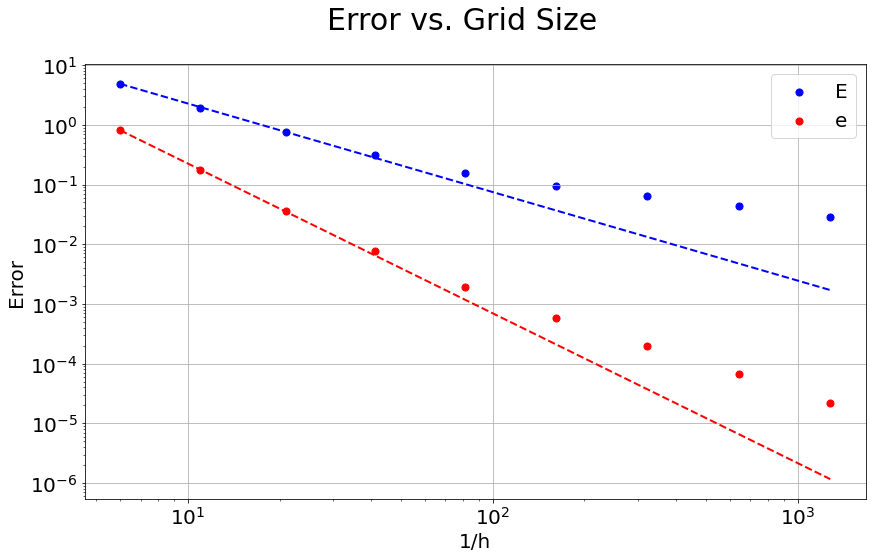

In [104]:
from scipy.optimize import curve_fit

f, ax1 = plt.subplots(1, 1, figsize=(14, 8), facecolor='w')
f.suptitle(f"Error vs. Grid Size", fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=20)

lw = 2
ls = "--"

grid_sizes = np.array([5, 10, 20, 40, 80, 160, 320, 640, 1280])
grid_sizes += 1

ax1.scatter(grid_sizes, errors, color="Blue", s=50, label="E")
ax1.scatter(grid_sizes, errors / grid_sizes, color="Red", s=50, label="e")

alpha, beta = curve_fit(lambda t,a,b: b*(t**a), grid_sizes, errors)[0]
ax1.plot(grid_sizes, beta*(grid_sizes**alpha), color="Blue", lw=lw, linestyle=ls)

alpha, beta = curve_fit(lambda t,a,b: b*(t**a), grid_sizes, errors / grid_sizes)[0]
ax1.plot(grid_sizes, beta*(grid_sizes**alpha), color="Red", lw=lw, linestyle=ls)

alpha, beta = curve_fit(lambda t,a,b: b*(t**a), 1/grid_sizes, errors)[0]
print(f"{alpha} {beta}")
alpha, beta = curve_fit(lambda t,a,b: b*(t**a), 1/grid_sizes, errors / (grid_sizes-1))[0]
print(f"{alpha} {beta}")

ax1.set_xlabel("1/h", fontsize=20)
ax1.set_ylabel("Error", fontsize=20)
ax1.semilogx()
ax1.semilogy()
ax1.grid()
ax1.legend(fontsize=20)

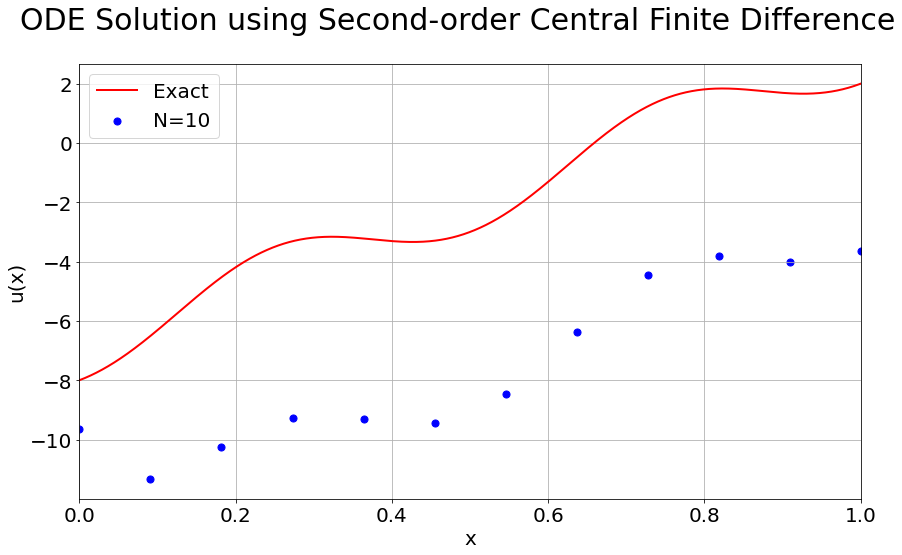

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define Computational Grid, N = number of interior points
N = 10
x_grid = np.linspace(0, 1, N+2)
u = np.zeros(N+2)
du = np.zeros(N+2)
# Apply Boundary Conditions
du[0] = 10
u[-1] = 2
# Calculate step size
h = 1/(N+1)
# Define the second derivative of u, described by f(x)
f = lambda x : ((4*np.pi)**2)*np.cos(4*np.pi*x)
# Compute solution using central finite difference

order1_matrix = np.zeros((N+2, N+2)) + 2*np.eye(N+2) - 1.5*np.eye(N+2, k=1) - 0.5*np.eye(N+2, k=-1)
du = np.linalg.inv(order1_matrix).dot(du)

order2_matrix = np.zeros((N+2, N+2)) - 2*np.eye(N+2) + np.eye(N+2, k=1) + np.eye(N+2, k=-1)

u = np.linalg.inv(order2_matrix).dot((h**2)*f(x_grid) + du + u)

# Read in exact solution file
with open("solutionB_N10000.dat") as file:
    lines = file.readlines()
exact_x = np.zeros(len(lines))
exact_y = np.zeros(len(lines))
for index, line in enumerate(lines):
    exact_x[index] = float(line.split()[0])
    exact_y[index] = float(line.split()[1])

# Plot the numerical approximation and exact solution
f, ax1 = plt.subplots(1, 1, figsize=(14, 8), facecolor='w')
f.suptitle(f"ODE Solution using Second-order Central Finite Difference", fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=20)

lw = 2

ax1.scatter(x_grid, u, color="Blue", s=50, label="N=10")
ax1.plot(exact_x, exact_y, color="Red", linewidth=lw, label="Exact")
ax1.set_xlim(0,1)
# ax1.set_ylim(-1,4)
ax1.set_xlabel("x", fontsize=20)
ax1.set_ylabel("u(x)", fontsize=20)
ax1.grid()
ax1.legend(fontsize=20)

In [60]:
for i in range(10):
    print(f"{round(x_grid[i], 3)} & {round(u[i], 3)} ")

0.0 & -9.652 
0.091 & -11.333 
0.182 & -10.25 
0.273 & -9.28 
0.364 & -9.315 
0.455 & -9.455 
0.545 & -8.468 
0.636 & -6.375 
0.727 & -4.464 
0.818 & -3.805 
